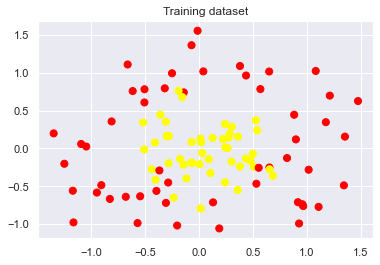

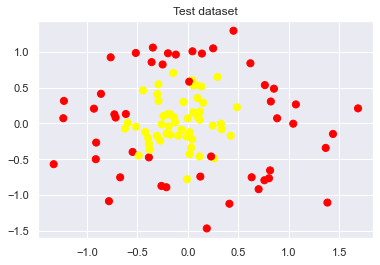

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(200, factor=0.2, noise=0.3, random_state=1) 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)
plt.title('Training dataset')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.show()
plt.title('Test dataset')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='autumn') 
plt.show()

In [12]:
# find best hyperparameters of SVM which can get the highest score in test dataset

from sklearn import svm
import pandas as pd
import numpy as np

# Create an instance of SVM and fit out data
C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear'),   # algo 與 svm.LinearSVC() 不同
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

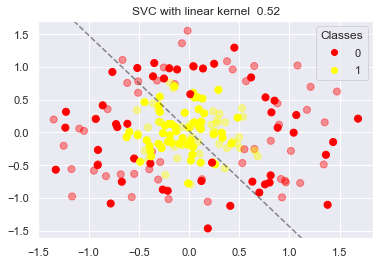

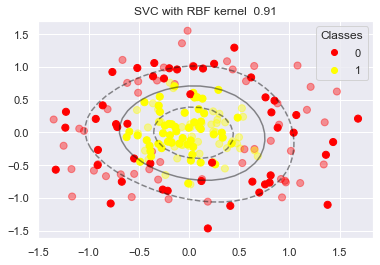

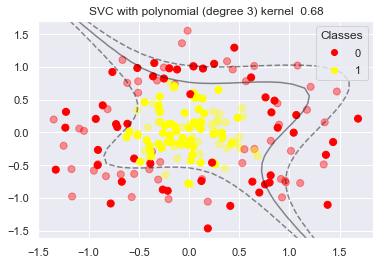

In [14]:
for clf, title in zip(models, titles):  # 使用 zip 對多個 list 進行迭代

    model_trained = clf.fit(x_train, y_train)
    # predicted = model_trained.predict(x_test)
    
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='autumn', alpha=0.4)
    scatter_test = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='autumn')
    legend_test = plt.legend(*scatter_test.legend_elements(), title="Classes")
    plot_svc_decision_function(model_trained)
    plt.title(title + '  ' + str(model_trained.score(x_train, y_train)))            
    plt.show()

accuracy rate: 0.93


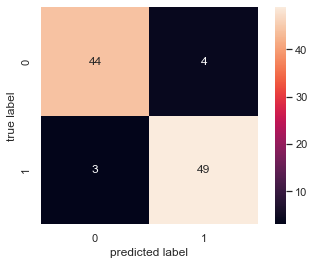

In [15]:
# use hyperparameters your find to report confusion matrix and accuracy in test dataset

from sklearn.metrics import confusion_matrix

# use seaborn plotting defaults
import seaborn as sns; sns.set()

best_model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
best_trained = best_model.fit(x_train, y_train)

mat = confusion_matrix(best_trained.predict(x_test), y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('predicted label')
plt.ylabel('true label');

print('accuracy rate:', best_trained.score(x_test, y_test))